In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D


In [26]:
dataframe = pd.read_csv(r"sonidos.csv")
dataframe.head()

,frecuencia1,ugen1,frecuencia2,ugen2,frecuencia3,ugen3
0,16838,9,7579,4,12851,0
1,5031,8,8673,4,11376,9
2,10285,2,10089,5,17702,9
3,1779,9,7285,8,2744,8
4,16730,7,4083,2,4379,11


In [27]:
dataframe.describe()

,frecuencia1,ugen1,frecuencia2,ugen2,frecuencia3,ugen3
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,10043.663300,5.455000,10071.172000,5.574600,10008.326500,5.514300
std,5757.233268,3.457712,5746.746501,3.447466,5748.553746,3.446126
min,25.000000,0.000000,21.000000,0.000000,20.000000,0.000000
25%,4990.250000,2.000000,5187.000000,3.000000,5074.750000,3.000000
50%,10023.500000,5.000000,10053.500000,6.000000,9953.500000,6.000000
75%,14992.250000,8.000000,15078.000000,9.000000,15009.750000,9.000000
max,19996.000000,11.000000,19998.000000,11.000000,19998.000000,11.000000


In [28]:
print(dataframe.groupby('ugen1').size())


ugen1
0     850
1     864
2     818
3     847
4     860
5     806
6     867
7     836
8     783
9     804
10    830
11    835
dtype: int64


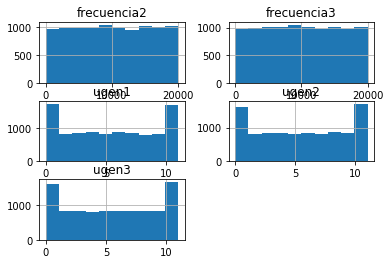

In [29]:
dataframe.drop(["frecuencia1"],1).hist()
plt.show()

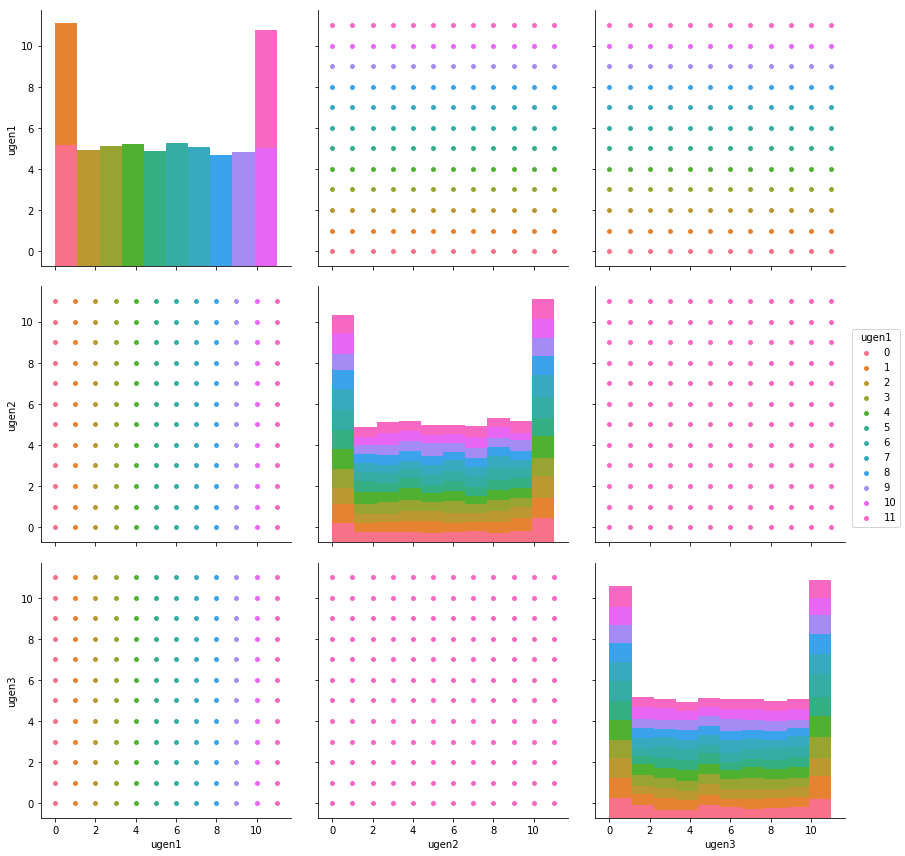

In [30]:
sb.pairplot(dataframe.dropna(), hue='ugen1',size=4,vars=["ugen1","ugen2","ugen3"],kind='scatter')

In [31]:
X = np.array(dataframe[["frecuencia1","ugen1","frecuencia2","ugen2","frecuencia3","ugen3"]])
y = np.array(dataframe['frecuencia1'])
X.shape

(10000, 6)

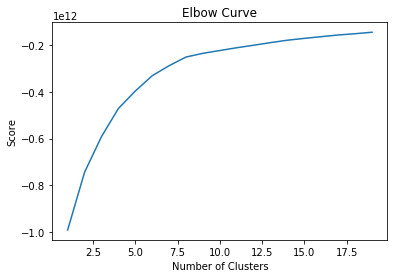

In [32]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[9.93381998e+03 5.45494594e+00 1.50525607e+04 5.56607930e+00
  1.00681306e+04 5.52482980e+00]
 [1.01532433e+04 5.45505394e+00 5.10172433e+03 5.58310028e+00
  9.94866580e+03 5.50379545e+00]]


In [24]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

NameError: name 'Axes3D' is not defined

<Figure size 432x288 with 0 Axes>

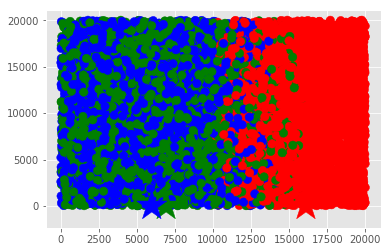

In [12]:
# Getting the values and plotting it
f1 = dataframe['frecuencia1'].values
f2 = dataframe['frecuencia2'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [14]:
copy =  pd.DataFrame()
copy['frecuencia1']=dataframe['frecuencia1'].values
copy['ugen1']=dataframe['ugen1'].values
copy['frecuencia2']=dataframe['frecuencia2'].values
copy['ugen2']=dataframe['ugen2'].values
copy['frecuencia3']=dataframe['frecuencia3'].values
copy['ugen3']=dataframe['ugen3'].values
copy['clase'] = labels;
#writer = pd.ExcelWriter('sonidosEtiquetados.xlsx')
#copy.to_excel(writer,'sonidos');
#writer.save()
copy.to_csv("sonidosEtiquetados.csv", index=False)
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('clase').size()
cantidadGrupo

,color,cantidad
0,red,3719
1,green,3179
2,blue,3102


In [26]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['ugen1']=[0,1,2,3,4,5,6,7,8,9,10,11]
diversidadGrupo['cantidad']=group_referrals.groupby('ugen1').size()
diversidadGrupo

,ugen1,cantidad
0,0,442
1,1,444
2,2,400
3,3,426
4,4,420
5,5,376
6,6,455
7,7,415
8,8,391
9,9,393


In [27]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([8893, 7549], dtype=int64)

In [29]:
users=dataframe['frecuencia1'].values
for row in closest:
    print(users[row])

1062
19261


In [58]:
X_new = np.array([[10285,2,10089,5,17702,9]]) 

new_labels = kmeans.predict(X_new)
print(new_labels)

[1]
